## EDA

Ahora ralizaremos un Análisis de Datos Exploratorios para comprender mejor la estructura y características de nuestros datos. Esto nos puede ayudar a detectar posibles problemas con los datos y podemos tomar decisiones previas del entrenamiento del modelo.

Importamos librerías y configuramos el estilo de las visualizaciones

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../data/processed_data/processed_tickets.csv')
df

,complaint_what_happened,ticket_classification
0,good morning name appreciate could help put st...,Debt collection + Credit card debt
1,upgraded card //2018 told agent upgrade annive...,Credit card or prepaid card + General-purpose ...
2,"//2018 , trying book ticket , came across offe...","Credit reporting, credit repair services, or o..."
3,grand son give check { $ 1600.00 } deposit cha...,Checking or savings account + Checking account
4,please remove inquiry,"Credit reporting, credit repair services, or o..."
...,...,...
18032,husband passed away . chase bank put check hol...,Checking or savings account + Checking account
18033,"chase card customer well decade , offered mult...",Credit card or prepaid card + General-purpose ...
18034,"wednesday , // called chas , visa credit card ...",Credit card or prepaid card + General-purpose ...
18035,familiar pay understand great risk provides co...,Checking or savings account + Checking account


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18037 entries, 0 to 18036
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaint_what_happened  18037 non-null  object
 1   ticket_classification    18037 non-null  object
dtypes: object(2)
memory usage: 282.0+ KB


In [4]:
df.isnull().sum()

complaint_what_happened    0
ticket_classification      0
dtype: int64

### Distribución de las Categorías

Analizamos la distribución de las categorías de tickets `ticket_classification`, esto nos va a ayudar a identificar desiquilibrios en la distribución que pueden afectar el modelo.

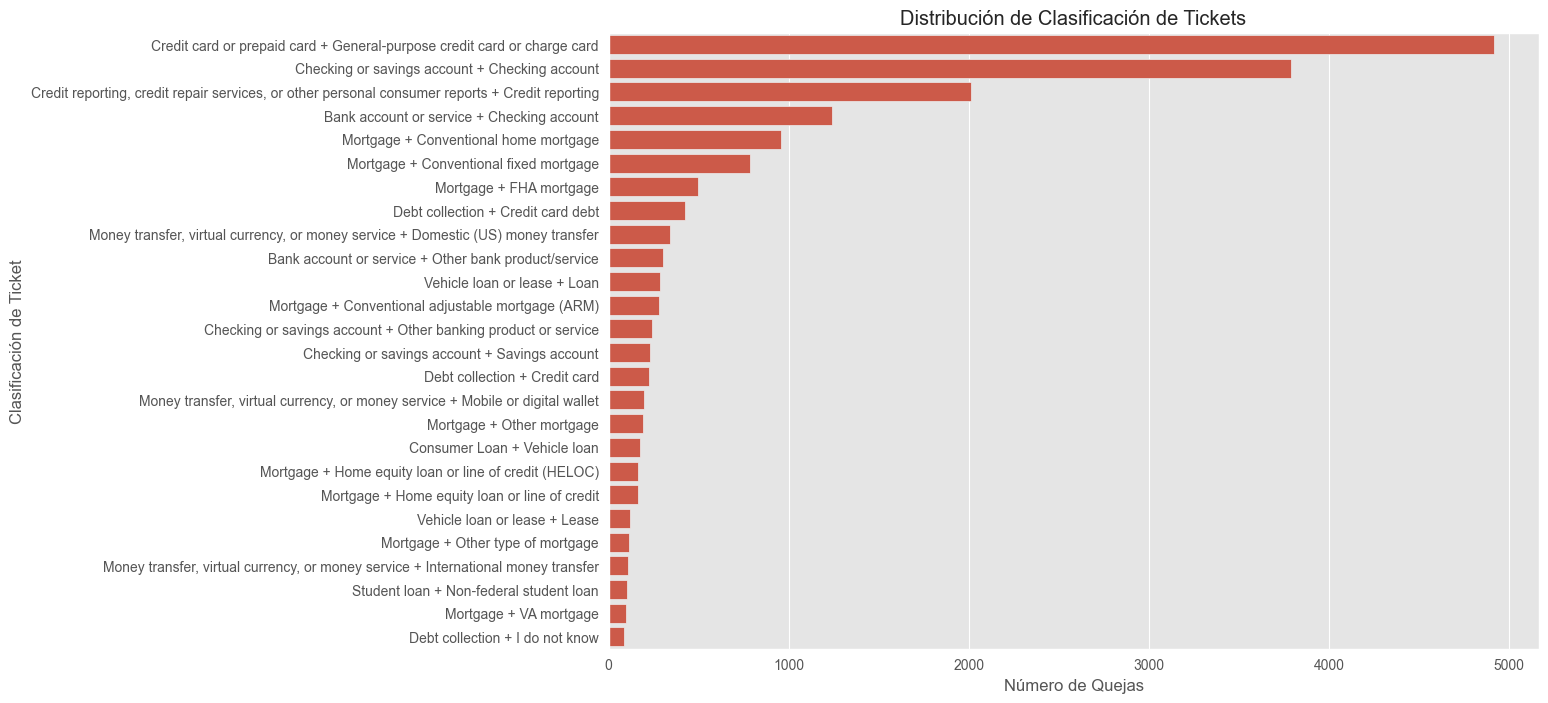

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(y='ticket_classification', data=df, order=df['ticket_classification'].value_counts().index)
plt.title("Distribución de Clasificación de Tickets")
plt.xlabel("Número de Quejas")
plt.ylabel("Clasificación de Ticket")
plt.show()

Podemos observar que las clases están sumamente desbalanceadas. Algunas categorías tienen una cantidad significativamente mayor de registros en comparación con otras. Este desequilibrio puede afectar negativamente el rendimiento del modelo de clasificación, ya que podría favorecer las clases más frecuentes.

Para abordar este problema, consideraremos dos opciones:
1.	Sobremuestrear las categorías menos frecuentes para equilibrar la distribución.
2. Eliminar las categorías que no tienen una cantidad significativa de ocurrencias.

En este caso, optaremos por eliminar las clases con baja frecuencia para centrarnos en las categorías que son más representativas y repetidas, evitando introducir ruido en el modelo.

Definimos una frecuencia mínima para las categorías y filtramos el DataFrame para conservar únicamente aquellas que cumplen con este umbral.

In [7]:
min_frequency = 80
value_counts = df['ticket_classification'].value_counts()

In [8]:
categories_to_keep = value_counts[value_counts >= min_frequency].index
filtered_df = df[df['ticket_classification'].isin(categories_to_keep)]

filtered_df

,complaint_what_happened,ticket_classification
0,good morning name appreciate could help put st...,Debt collection + Credit card debt
1,upgraded card //2018 told agent upgrade annive...,Credit card or prepaid card + General-purpose ...
2,"//2018 , trying book ticket , came across offe...","Credit reporting, credit repair services, or o..."
3,grand son give check { $ 1600.00 } deposit cha...,Checking or savings account + Checking account
4,please remove inquiry,"Credit reporting, credit repair services, or o..."
...,...,...
18032,husband passed away . chase bank put check hol...,Checking or savings account + Checking account
18033,"chase card customer well decade , offered mult...",Credit card or prepaid card + General-purpose ...
18034,"wednesday , // called chas , visa credit card ...",Credit card or prepaid card + General-purpose ...
18035,familiar pay understand great risk provides co...,Checking or savings account + Checking account


Guardamos los datos filtrados en un nuevo archivo CSV.

In [28]:
processed_data_dir = '../data/processed_data'
os.makedirs(processed_data_dir, exist_ok=True)
filtered_df.to_csv(os.path.join(processed_data_dir, 'processed_tickets.csv'), index=False)

### Nubes de palabras por categoría

Ahora visualizaremos cuáles son las palabras más frecuentes en las descripciones de las quejas para cada una de las principales categorías, esto nos ayuda a entender mejor los temas que normalmente aparecen en cada tipo de ticket.

Seleccionaremos las 10 categorías más frecuentes.

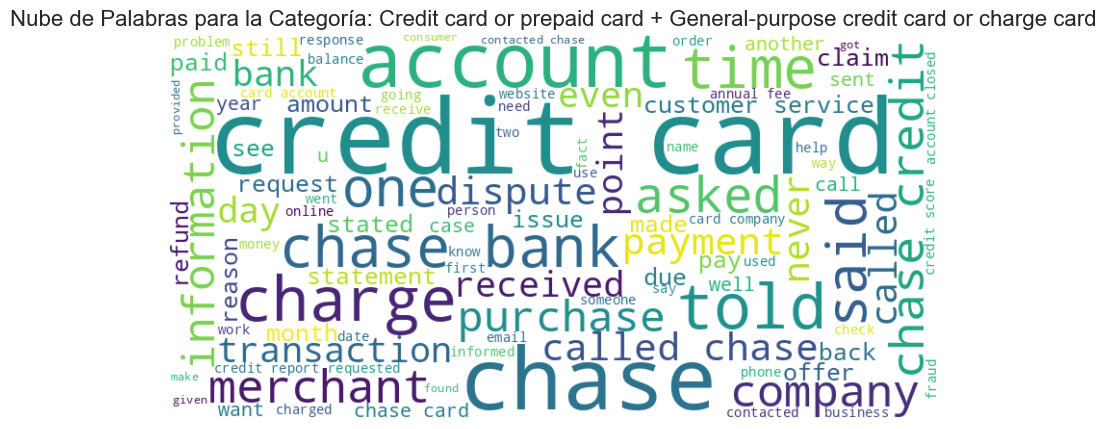

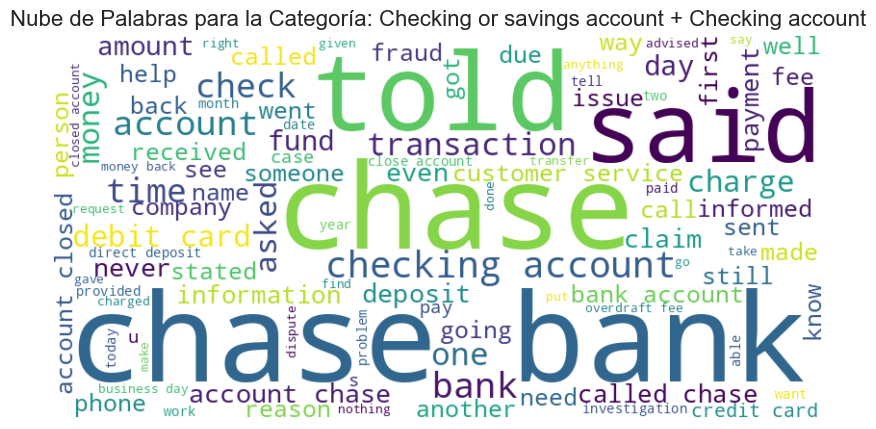

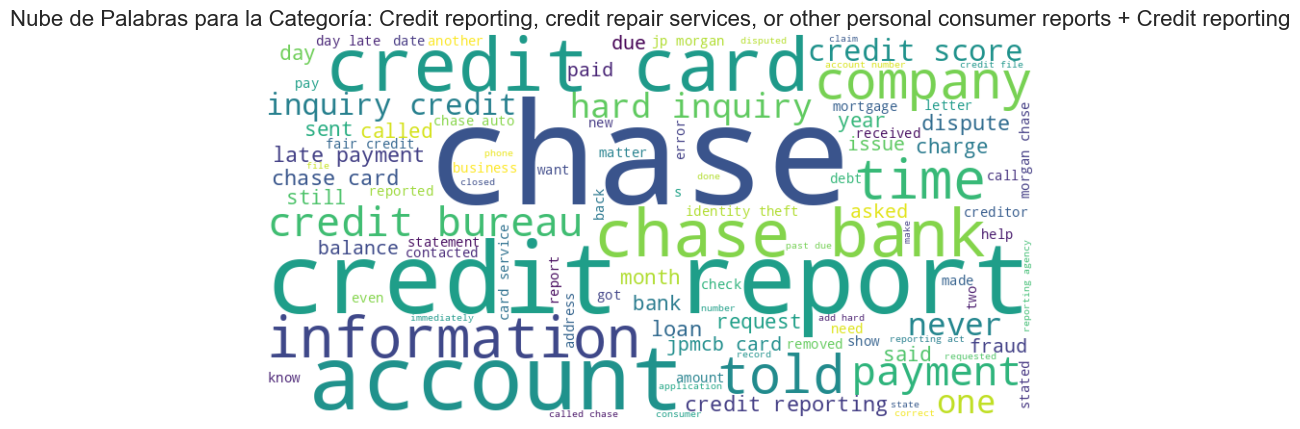

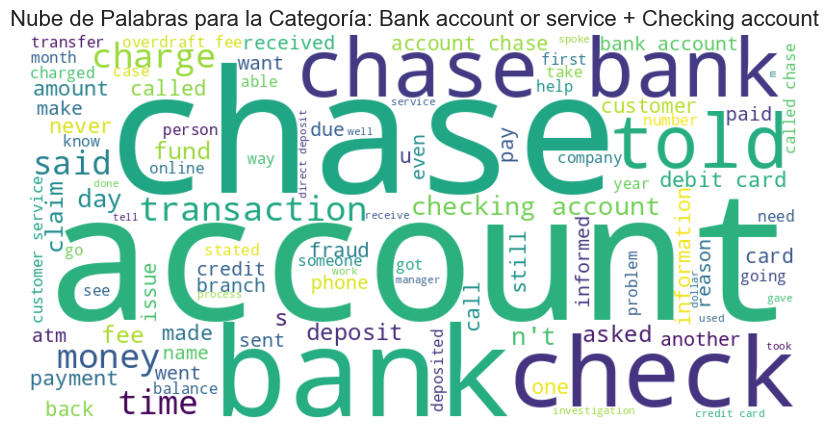

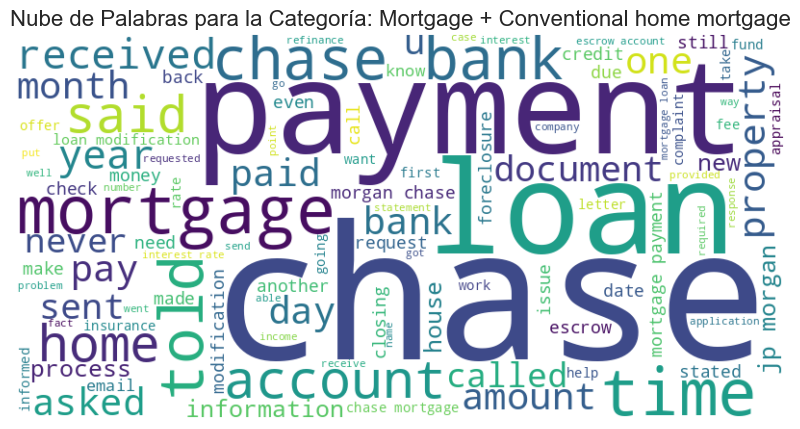

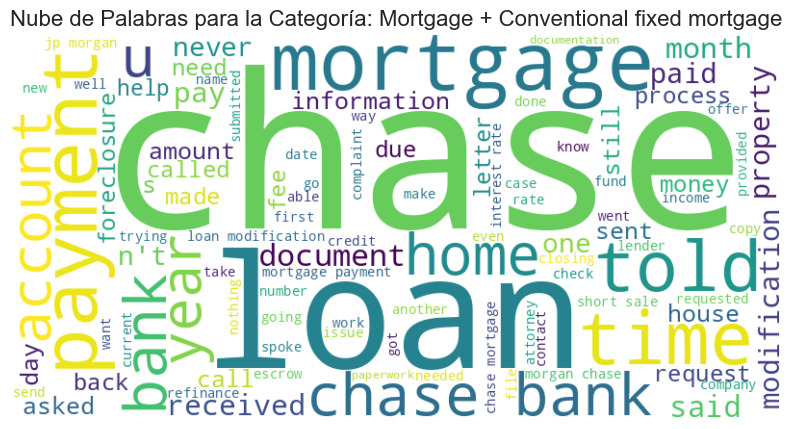

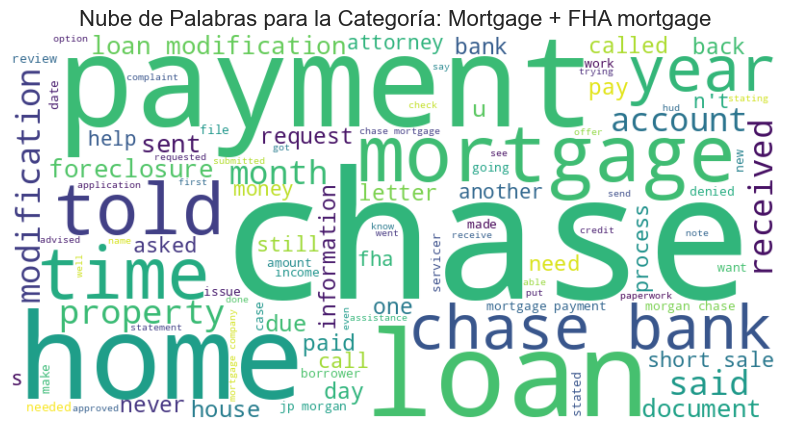

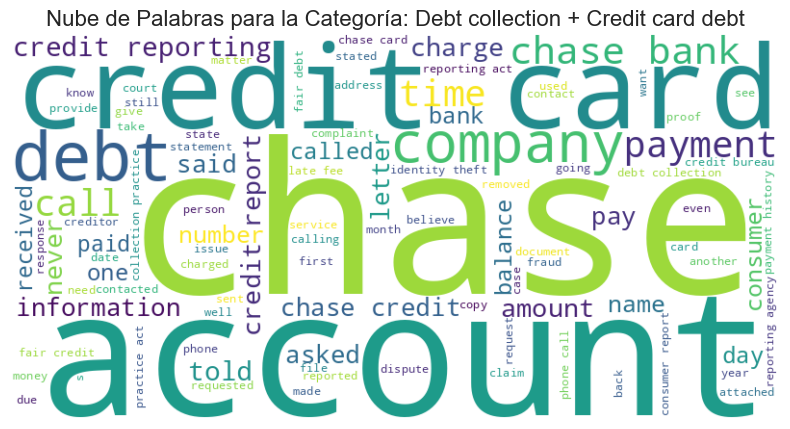

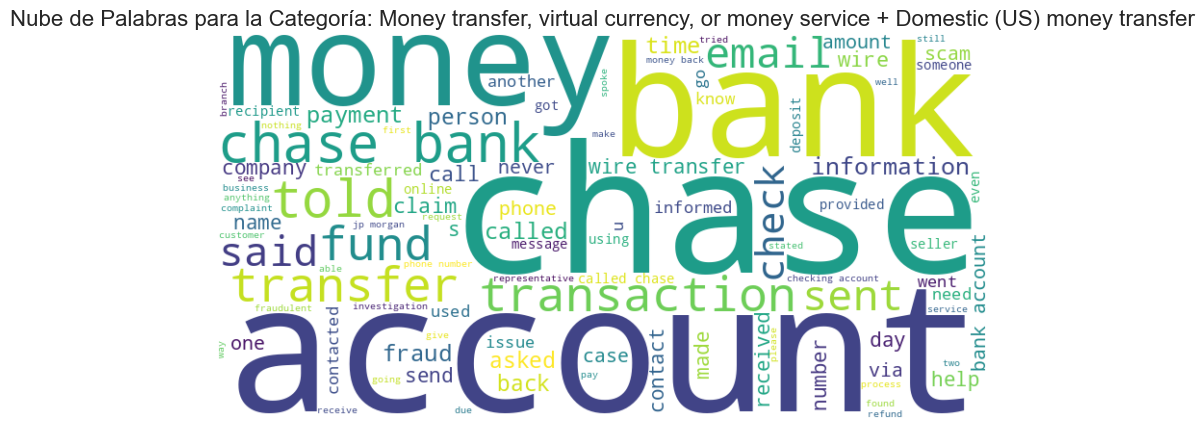

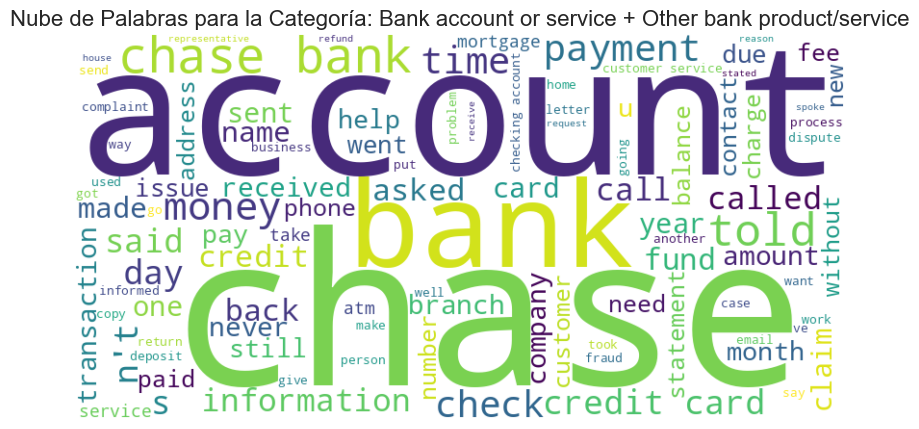

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

top_categories = df['ticket_classification'].value_counts().nlargest(10).index

# Crear una nube de palabras para cada categoría
for category in top_categories:
    text = " ".join(df[df['ticket_classification'] == category]['complaint_what_happened'])
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='viridis',
        max_words=100,
        stopwords=None
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Nube de Palabras para la Categoría: {category}", fontsize=16)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


Podemos ver en las nubes de palabras anteriores cuáles son las palabras más comunes en cada categoría de tickets, esto nos sirve para identificar los temas y problemas más frecuentes asociados con cada tipo de queja.

### Análisis de la Longitud de las Quejas

Evaluaremos la longitud de las descripciones de las quejas para poder identificar patrones para ver si tienen algo que ver con la categoría a la que pertenecen.

In [9]:
filtered_df['complaint_length'] = filtered_df['complaint_what_happened'].apply(lambda x: len(x.split()))

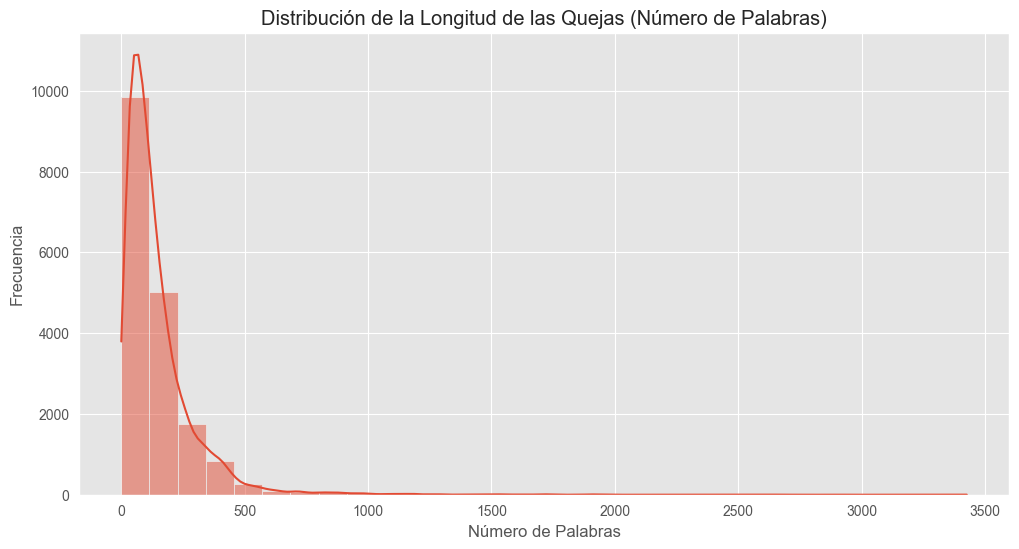

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['complaint_length'], bins=30, kde=True)
plt.title("Distribución de la Longitud de las Quejas (Número de Palabras)")
plt.xlabel("Número de Palabras")
plt.ylabel("Frecuencia")
plt.show()

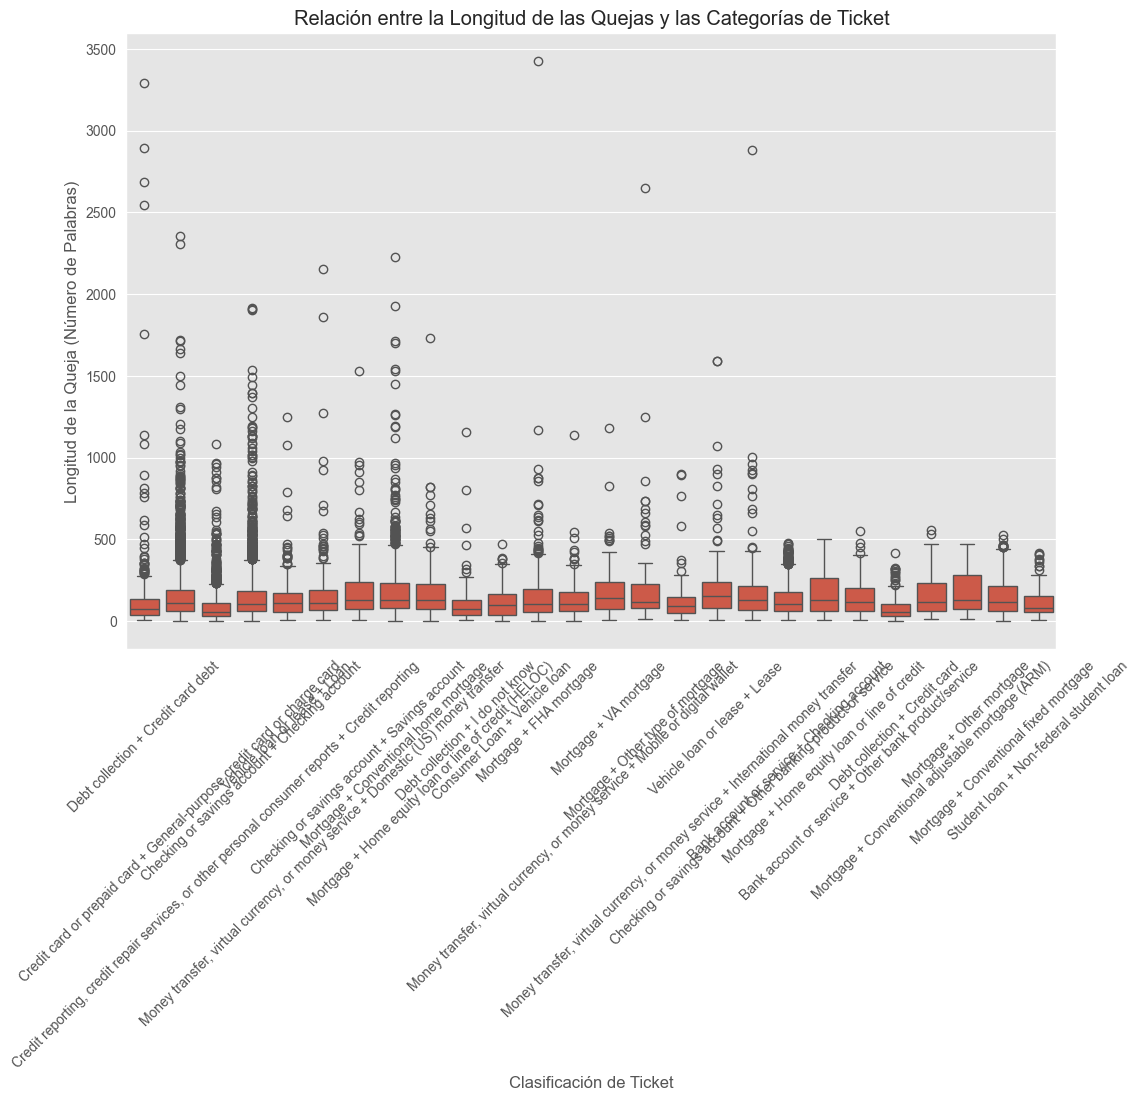

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='ticket_classification', y='complaint_length', data=filtered_df)
plt.title('Relación entre la Longitud de las Quejas y las Categorías de Ticket')
plt.xlabel('Clasificación de Ticket')
plt.ylabel('Longitud de la Queja (Número de Palabras)')
plt.xticks(rotation=45)
plt.show()

Podemos observar algo muy interesante aquí, hay categorías  como `Debt collection + Credit card debt` y `Mortgage + Home equity loan or line of credit` que tienden a tener quejas más largas en promedio. Esto sugiere que estos temas pueden involucrar situaciones más complejas o que requieren explicaciones más detalladas.

Por otro lado, hay categorías con quejas más cortas en promedio. Esto podría indicar que los problemas asociados con estas categorías son más sencillos de explicar o que los clientes están menos dispuestos a detallar sus quejas.

Hasta ahora podemos decir que hicimos los siguientes hallazgos:
+ Identificamos un desiquilibrio en las clases y filtramos las categorías menos frecuentes.


+ Visualizamos las palabras y combinaciones de palabra más frecuentes en las nubes de palabras, esto es importante para identificar de qué es lo que más se habla en cada categoría y puede ser muy útil para el aprendizaje del modelo.


+ Analizamos la distribución de longitud de las quejas y la cantidad de palabras que se usaban en cada una, esto nos dio una información muy valiosa, las categorías que tienen quejas más largas tienden a ser de situaciones más complejas que necesiten mayor explicación, mientras que las que tienen quejas más cortas tienden a ser de situaciones más sencillas que no requieren mucha explicación